In [3]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../DB_Connection'))
sys.path.append(os.path.abspath('../src'))

In [4]:
from db import load_data_from_postgres,load_data_using_sqlalchemy,export_data_to_postgres,verify_export
from utils import missing_values_table,convert_bytes_to_megabytes,remove_all_columns_outliers


In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


d:\Kifya\Week_02\DB_Connection\db.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
data=df.copy()

In [7]:
# Check for missing values
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# Summary statistics for numerical columns
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [9]:
missing_values_df = missing_values_table(data)
print("Missing Values in df:\n\n")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:


                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)     

In [10]:
import pandas as pd
# Convert 'Start' and 'End' columns to datetime format
data['Start'] = pd.to_datetime(data['Start'], errors='coerce')
data['End'] = pd.to_datetime(data['End'], errors='coerce')

# Check for any missing values introduced due to invalid date formats
# missing_dates = droped_data[['Start', 'End']].isnull().sum()


In [11]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
# Summary statistics for numerical columns
data.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,2019-04-26 12:36:09.616800,499.188200,2019-04-27 17:39:38.703200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,2019-04-27 18:18:15,749.000000,2019-04-29 07:15:00,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,2.893173e+18,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08


In [13]:
print(data.dtypes)

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [14]:
# fill numeric missing value with mean
numeric_cols = data.select_dtypes(include='number').columns
data_filled_numeric = data[numeric_cols].fillna(data[numeric_cols].mean())


In [15]:
# Fill non-numeric columns with a placeholder or mode
non_numeric_cols = data.select_dtypes(exclude='number').columns

data_filled_non_numeric = data[non_numeric_cols].fillna('Unknown')

In [16]:
# Merge both numeric and non-numeric
new_data = pd.concat([data_filled_numeric, data_filled_non_numeric], axis=1)


# check missing value after hadle it
print(new_data.isnull().sum())


Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

In [17]:
new_data.shape

(150001, 55)

In [18]:
data_iqr_cleaned = remove_all_columns_outliers(new_data, method="iqr")
data_cleaned_zscore = remove_all_columns_outliers(new_data, method="zscore")
# Check the shape of the cleaned 
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape (IQR method): {data_iqr_cleaned.shape}")
print(f"Cleaned data shape (Z-score method): {data_cleaned_zscore.shape}")

Column: Bearer Id
  Q1: 7.34988324744792e+18, Q3: 1.30424259789285e+19, IQR: 5.692542731480581e+18, Lower Bound: -1.1889308497729526e+18, Upper Bound: 2.1581240076149375e+19
Column: Start ms
  Q1: 250.0, Q3: 749.0, IQR: 499.0, Lower Bound: -498.5, Upper Bound: 1497.5
Column: End ms
  Q1: 251.0, Q3: 750.0, IQR: 499.0, Lower Bound: -497.5, Upper Bound: 1498.5
Column: Dur. (ms)
  Q1: 57442.0, Q3: 132430.0, IQR: 74988.0, Lower Bound: -55040.0, Upper Bound: 244912.0
Column: IMSI
  Q1: 208201401266371.0, Q3: 208201771559170.0, IQR: 370292799.0, Lower Bound: 208200845827172.5, Upper Bound: 208202326998368.5
Column: MSISDN/Number
  Q1: 33651858471.0, Q3: 33684578386.0, IQR: 32719915.0, Lower Bound: 33602778598.5, Upper Bound: 33733658258.5
Column: IMEI
  Q1: 35482609793567.0, Q3: 86293404018547.0, IQR: 50810794224980.0, Lower Bound: -40733581543903.0, Upper Bound: 162509595356017.0
Column: Avg RTT DL (ms)
  Q1: 35.0, Q3: 109.79570605376027, IQR: 74.79570605376027, Lower Bound: -77.193559080640

### Take Z-score for taking most essential datas

In [19]:
# df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
# df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

# Step 3: Remove or handle outliers using z-scores or IQR methods (not shown here for simplicity) it is already done in EDA part

# Step 4: Group by customer (MSISDN/Number)
new_data['Total TCP Retrans. (Bytes)'] = new_data['TCP DL Retrans. Vol (Bytes)'] + new_data['TCP UL Retrans. Vol (Bytes)']

# Step 5: Aggregate average TCP retransmission per customer
customer_tcp_retrans = new_data.groupby('MSISDN/Number')['Total TCP Retrans. (Bytes)'].mean().reset_index()

# Step 6: Display the result
print('\nAverage TCP transmission per customer\n',customer_tcp_retrans)


Average TCP transmission per customer
         MSISDN/Number  Total TCP Retrans. (Bytes)
0        3.360100e+10                2.156957e+07
1        3.360100e+10                2.156957e+07
2        3.360100e+10                2.156957e+07
3        3.360101e+10                7.607247e+05
4        3.360101e+10                1.547020e+07
...               ...                         ...
106852   3.379000e+10                2.156957e+07
106853   4.188282e+10                1.698397e+07
106854   3.197021e+12                2.156957e+07
106855   3.370000e+14                2.156957e+07
106856   8.823971e+14                2.156957e+07

[106857 rows x 2 columns]


In [20]:
new_data['Total RTT (ms)'] = new_data['Avg RTT DL (ms)'] + new_data['Avg RTT UL (ms)']

# Step 3: Group by customer (MSISDN/Number) and calculate average total RTT
average_rtt = new_data.groupby('MSISDN/Number')['Total RTT (ms)'].mean().reset_index()

# Step 4: Result - average RTT per customer
print('\nAverage RTT\n\n',average_rtt)


Average RTT

         MSISDN/Number  Total RTT (ms)
0        3.360100e+10       46.000000
1        3.360100e+10       31.000000
2        3.360100e+10      127.458589
3        3.360101e+10       84.000000
4        3.360101e+10       59.500000
...               ...             ...
106852   3.379000e+10       40.000000
106853   4.188282e+10      309.123982
106854   3.197021e+12      127.458589
106855   3.370000e+14      127.458589
106856   8.823971e+14      127.458589

[106857 rows x 2 columns]


In [21]:

handset_per_customer = new_data.groupby('MSISDN/Number')['Handset Type'].first().reset_index()

#  Display the result
print('Handset\n',handset_per_customer)


Handset
         MSISDN/Number                      Handset Type
0        3.360100e+10    Huawei P20 Lite Huawei Nova 3E
1        3.360100e+10            Apple iPhone 7 (A1778)
2        3.360100e+10                         undefined
3        3.360101e+10           Apple iPhone 5S (A1457)
4        3.360101e+10           Apple iPhone Se (A1723)
...               ...                               ...
106852   3.379000e+10       Apple iPhone 8 Plus (A1897)
106853   4.188282e+10                           Unknown
106854   3.197021e+12  Quectel Wireless. Quectel Ec25-E
106855   3.370000e+14                  Huawei B525S-23A
106856   8.823971e+14  Quectel Wireless. Quectel Ec21-E

[106857 rows x 2 columns]


In [22]:
new_data['Total Throughput (kbps)'] = new_data['Avg Bearer TP DL (kbps)'] + new_data['Avg Bearer TP UL (kbps)']

#  Group by customer (MSISDN/Number) and calculate average total throughput
average_throughput = new_data.groupby('MSISDN/Number')['Total Throughput (kbps)'].mean().reset_index()

# Display the result
print('\nAverage throughput per user \n\n',average_throughput)


Average throughput per user 

         MSISDN/Number  Total Throughput (kbps)
0        3.360100e+10                76.000000
1        3.360100e+10                99.000000
2        3.360100e+10                97.000000
3        3.360101e+10               248.000000
4        3.360101e+10             28422.000000
...               ...                      ...
106852   3.379000e+10               116.000000
106853   4.188282e+10             16958.943222
106854   3.197021e+12                 1.000000
106855   3.370000e+14                33.000000
106856   8.823971e+14                 2.000000

[106857 rows x 2 columns]


In [23]:
new_data['Total TCP Retrans. (Bytes)'] = new_data['TCP DL Retrans. Vol (Bytes)'] + new_data['TCP UL Retrans. Vol (Bytes)']

# Step 3: Sort by total TCP retransmission to get top 10 and bottom 10 values
top_10_tcp_values = new_data['Total TCP Retrans. (Bytes)'].nlargest(10)
bottom_10_tcp_values = new_data['Total TCP Retrans. (Bytes)'].nsmallest(10)

# Step 4: Find the 10 most frequent TCP retransmission values
most_frequent_tcp_values = new_data['Total TCP Retrans. (Bytes)'].value_counts().head(10)

# Step 5: Display results
print("\nTop 10 TCP Values:\n", top_10_tcp_values)
print("\nBottom 10 TCP Values:\n", bottom_10_tcp_values)
print("\n10 Most Frequent TCP Values:\n", most_frequent_tcp_values)


Top 10 TCP Values:
 34645     4.344116e+09
140813    4.301477e+09
77982     4.294432e+09
135678    4.291465e+09
3782      4.288121e+09
119677    4.275492e+09
39637     4.268647e+09
59016     4.261616e+09
76993     4.260174e+09
41209     4.254660e+09
Name: Total TCP Retrans. (Bytes), dtype: float64

Bottom 10 TCP Values:
 143594     86.0
111106     97.0
18432     106.0
13157     108.0
97069     113.0
8816      128.0
99958     129.0
83230     134.0
95965     134.0
12866     143.0
Name: Total TCP Retrans. (Bytes), dtype: float64

10 Most Frequent TCP Values:
 Total TCP Retrans. (Bytes)
2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
2.081123e+07      132
7.597507e+05      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
Name: count, dtype: int64


In [24]:
new_data['Total RTT (ms)'] = new_data['Avg RTT DL (ms)'] + new_data['Avg RTT UL (ms)']

# Step 3: Sort by total RTT to get top 10 and bottom 10 values
top_10_rtt_values = new_data['Total RTT (ms)'].nlargest(10)
bottom_10_rtt_values = new_data['Total RTT (ms)'].nsmallest(10)

# Step 4: Find the 10 most frequent RTT values
most_frequent_rtt_values = new_data['Total RTT (ms)'].value_counts().head(10)

# Step 5: Display results
print("\nTop 10 RTT Values:\n", top_10_rtt_values)
print("\nBottom 10 RTT Values:\n", bottom_10_rtt_values)
print("\n10 Most Frequent RTT Values:\n", most_frequent_rtt_values)


Top 10 RTT Values:
 30166     96924.0
29927     64641.0
17910     55812.0
5989      54848.0
22851     27278.0
23455     26300.0
1373      25922.0
81277     25715.0
97320     25388.0
100582    24738.0
Name: Total RTT (ms), dtype: float64

Bottom 10 RTT Values:
 42612     0.0
103326    0.0
124541    0.0
143878    0.0
71739     2.0
50974     4.0
144923    4.0
103549    5.0
8778      6.0
123213    6.0
Name: Total RTT (ms), dtype: float64

10 Most Frequent RTT Values:
 Total RTT (ms)
127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
41.000000      1978
31.000000      1960
Name: count, dtype: int64


In [25]:
new_data['Total Throughput (kbps)'] = new_data['Avg Bearer TP DL (kbps)'] + new_data['Avg Bearer TP UL (kbps)']

# Step 3: Sort by total throughput to get top 10 and bottom 10 values
top_10_throughput_values = new_data['Total Throughput (kbps)'].nlargest(10)
bottom_10_throughput_values = new_data['Total Throughput (kbps)'].nsmallest(10)

# Step 4: Find the 10 most frequent throughput values
most_frequent_throughput_values = new_data['Total Throughput (kbps)'].value_counts().head(10)

# Step 5: Display results
print("Top 10 Throughput Values:\n", top_10_throughput_values)
print("Bottom 10 Throughput Values:\n", bottom_10_throughput_values)
print("10 Most Frequent Throughput Values:\n", most_frequent_throughput_values)

Top 10 Throughput Values:
 120884    382262.0
143670    313244.0
141262    304299.0
91318     300546.0
116800    283931.0
141458    281144.0
149617    277152.0
92198     276205.0
116558    274052.0
117784    269888.0
Name: Total Throughput (kbps), dtype: float64
Bottom 10 Throughput Values:
 149     0.0
364     0.0
618     0.0
756     0.0
1818    0.0
2489    0.0
3935    0.0
4166    0.0
4853    0.0
5821    0.0
Name: Total Throughput (kbps), dtype: float64
10 Most Frequent Throughput Values:
 Total Throughput (kbps)
63.0    3886
15.0    3741
97.0    1945
90.0    1885
98.0    1801
96.0    1671
99.0    1571
89.0    1557
91.0    1520
93.0    1491
Name: count, dtype: int64


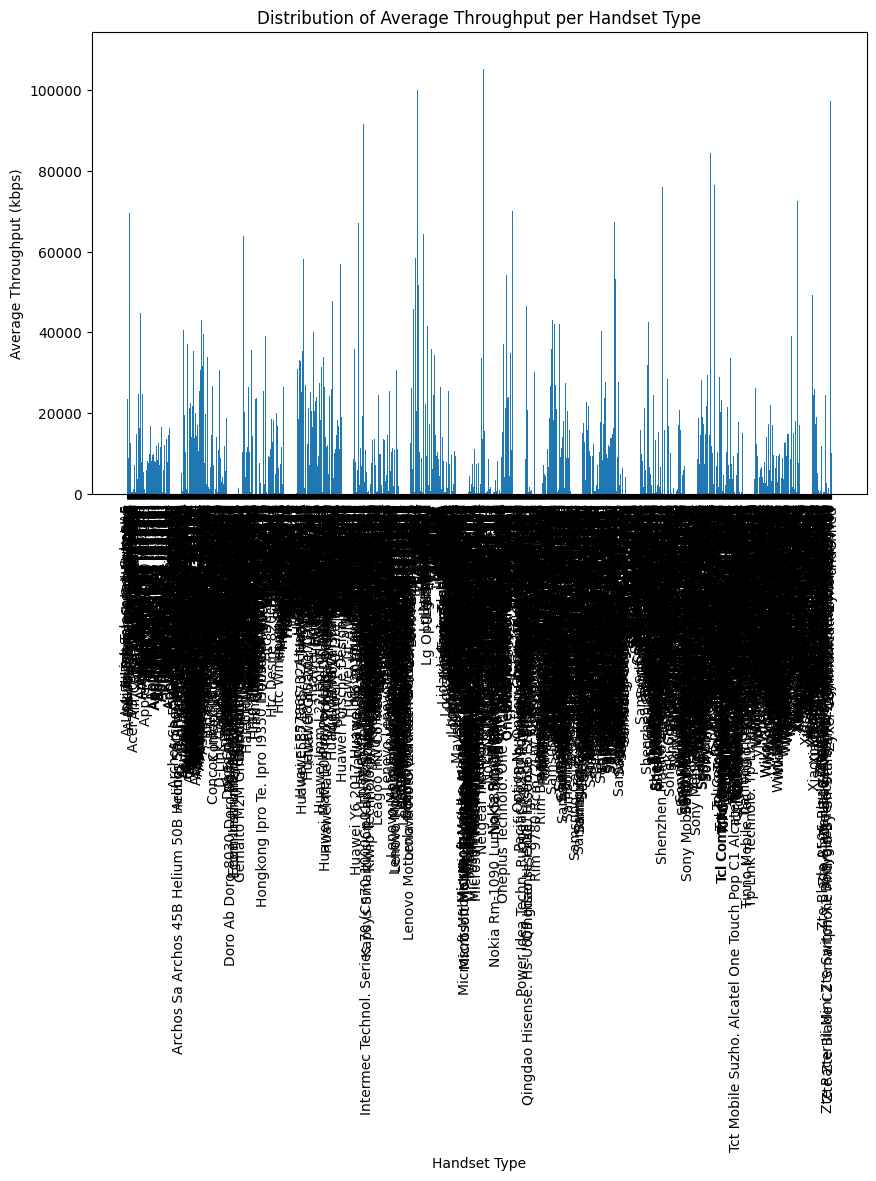

average throughput per handset type
                                            Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1392  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1393                          Zyxel Communicat. Lte7460   
1394                          Zyxel Communicat. Sbg3600   
1395                    Zyxel Communicat. Zyxel Wah7706   
1396                                          undefined   

      Total Throughput (kbps)  
0                23510.000000  
1                 6699.000000  
2                 8937.000000  
3                56217.000000  
4                69468.000000  
...                       ...  
1392                58.000000 

In [26]:
import matplotlib.pyplot as plt
new_data['Total Throughput (kbps)'] = new_data['Avg Bearer TP DL (kbps)'] + new_data['Avg Bearer TP UL (kbps)']

# Group by handset type and calculate the average throughput for each type
average_throughput_by_handset = new_data.groupby('Handset Type')['Total Throughput (kbps)'].mean().reset_index()

# Plot the distribution of average throughput per handset type
plt.figure(figsize=(10,6))
plt.bar(average_throughput_by_handset['Handset Type'], average_throughput_by_handset['Total Throughput (kbps)'])
plt.xticks(rotation=90)
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.title('Distribution of Average Throughput per Handset Type')
plt.show()

# Display the result
print('average throughput per handset type\n',average_throughput_by_handset)

## Interpretation of Findings:
Once you have the distribution of average throughput across different handset types, you can interpret the findings as follows:

Throughput Variation Across Handsets:

The chart will show how different handset types perform in terms of throughput.
Handsets with higher throughput might be newer models or models that support faster data technologies like 4G/5G.
Old vs New Handsets:

Older handsets or those using older network technologies (e.g., 2G or 3G) might exhibit lower average throughput compared to newer handsets supporting 4G/5G.
Handset Brand or Model Influence:

Certain brands or models might be optimized for network performance, showing higher throughput values.
Some handset types may show lower throughput due to hardware or software limitations.
Network Capability:

Handset types that consistently show high throughput values may indicate they are leveraging faster networks, whereas lower throughput might suggest either handset limitations or network capability issues.

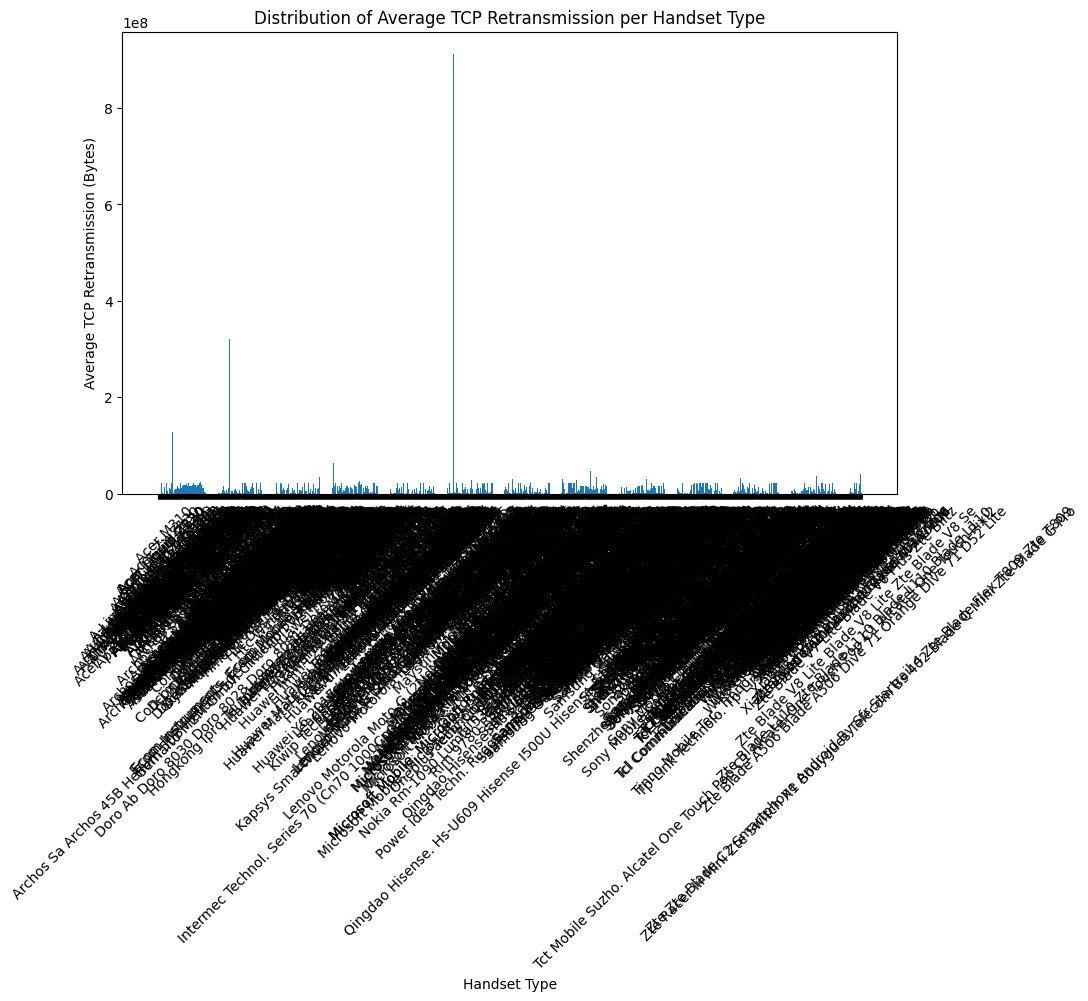

                                           Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1392  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1393                          Zyxel Communicat. Lte7460   
1394                          Zyxel Communicat. Sbg3600   
1395                    Zyxel Communicat. Zyxel Wah7706   
1396                                          undefined   

      Total TCP Retrans. (Bytes)  
0                   2.156957e+07  
1                   6.162130e+05  
2                   4.141173e+07  
3                   1.371700e+05  
4                   8.041000e+03  
...                          ...  
1392                1.116595e+07  
1393       

In [27]:
# Calculate total TCP retransmission (Downlink + Uplink) for each session
new_data['Total TCP Retrans. (Bytes)'] = new_data['TCP DL Retrans. Vol (Bytes)'] + new_data['TCP UL Retrans. Vol (Bytes)']

# Step 3: Group by handset type and calculate the average TCP retransmission for each type
average_tcp_retrans_by_handset = new_data.groupby('Handset Type')['Total TCP Retrans. (Bytes)'].mean().reset_index()

# Plot the distribution of average TCP retransmission per handset type
plt.figure(figsize=(10,6))
plt.bar(average_tcp_retrans_by_handset['Handset Type'], average_tcp_retrans_by_handset['Total TCP Retrans. (Bytes)'])
plt.xticks(rotation=45)
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.title('Distribution of Average TCP Retransmission per Handset Type')
plt.show()

#  Display the result
print(average_tcp_retrans_by_handset)

## Interpretation of Findings:
Once the distribution of average TCP retransmission per handset type is calculated and visualized, we can interpret the findings as follows:

Higher TCP Retransmission:

Handsets with higher average TCP retransmission may indicate poor network conditions or suboptimal hardware performance.
High retransmission is often a result of packet loss, network congestion, or poor signal quality, which could be related to the handset’s network antenna performance.
Lower TCP Retransmission:

Handsets with lower average TCP retransmission may suggest better network performance or more efficient handling of network traffic.
These handsets may have better signal reception, be newer, or better optimized for current network technologies (like 4G/5G).
Handset Technology:

Older handsets or those using older network technologies (such as 3G or earlier) might exhibit higher TCP retransmission due to slower network speeds or outdated network protocols.
Brand/Model Impact:

Certain brands or models might have higher retransmission values due to hardware limitations, poor software optimization, or the use of less efficient network technologies.
Conversely, high-end handsets or those with better network optimization may show lower retransmission values, indicating superior performance in handling data transmission.

In [28]:
print(new_data.columns)

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

Cluster Analysis:
          Total Throughput (kbps)  Total RTT (ms)  Total TCP Retrans. (Bytes)
Cluster                                                                     
0                    4239.114751      132.527307                1.708107e+07
1                   62212.861408      104.954857                1.782254e+07
2                   71528.140562      150.345382                2.638426e+09


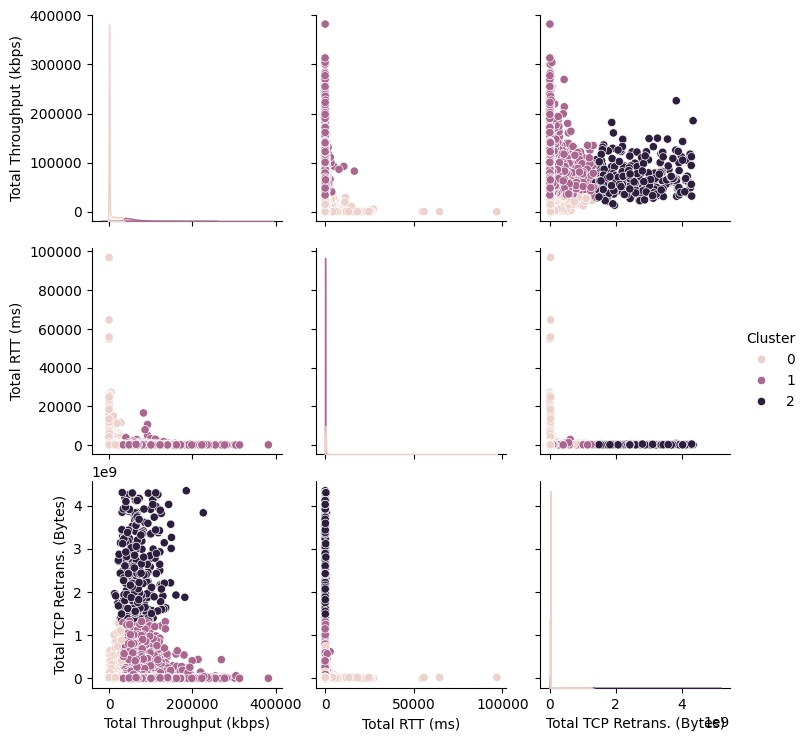

In [29]:
# In this task, we will apply K-Means Clustering (with k=3) to segment users based on their experience metrics. After clustering, we will describe each group based on the characteristics of the clusters.
# Experience Metrics to Use:
# We will use the following experience metrics, which relate to user experience in the network:

# Average Throughput (kbps): The combined throughput for downlink and uplink.
# Average RTT (ms): The total Round Trip Time.
# Average TCP Retransmission (Bytes): The total TCP retransmission volume (downlink + uplink).


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#  Create new columns for total throughput, total RTT, and total TCP retransmission
new_data['Total Throughput (kbps)'] = new_data['Avg Bearer TP DL (kbps)'] + new_data['Avg Bearer TP UL (kbps)']
new_data['Total RTT (ms)'] = new_data['Avg RTT DL (ms)'] + new_data['Avg RTT UL (ms)']
new_data['Total TCP Retrans. (Bytes)'] = new_data['TCP DL Retrans. Vol (Bytes)'] + new_data['TCP UL Retrans. Vol (Bytes)']

# Step 3: Select the experience metrics for clustering
experience_metrics = new_data[['Total Throughput (kbps)', 'Total RTT (ms)', 'Total TCP Retrans. (Bytes)']]

# Step 4: Standardize the features (scaling them to a similar range)
scaler = StandardScaler()
experience_metrics_scaled = scaler.fit_transform(experience_metrics)

# Step 5: Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
new_data['Cluster'] = kmeans.fit_predict(experience_metrics_scaled)

# Step 6: Analyze and describe each cluster by calculating the mean of each metric for each cluster
cluster_analysis = new_data.groupby('Cluster')[['Total Throughput (kbps)', 'Total RTT (ms)', 'Total TCP Retrans. (Bytes)']].mean()

# Step 7: Display the cluster analysis
print("Cluster Analysis:\n", cluster_analysis)

# Step 8: Plotting the clusters (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(new_data, hue="Cluster", vars=['Total Throughput (kbps)', 'Total RTT (ms)', 'Total TCP Retrans. (Bytes)'])
plt.show()

# Task-4

In [30]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd

# Step 1: Ensure we have the KMeans model and data from previous tasks
# The relevant features for clustering should already be created
# These include: 'Total Throughput (kbps)', 'Total RTT (ms)', 'Total TCP Retrans. (Bytes)'

# Step 2: Obtain the cluster centers (centroids) from the KMeans model
cluster_centers = kmeans.cluster_centers_

# Step 3: Identify the less engaged cluster
# Less engaged users typically have lower throughput, higher RTT, and higher TCP retransmission
# We will identify the cluster that has the lowest throughput
less_engaged_cluster_index = np.argmin(cluster_centers[:, 0])  # Assuming Total Throughput is the first feature

# Step 4: Get the centroid of the less engaged cluster
less_engaged_centroid = cluster_centers[less_engaged_cluster_index]

# Step 5: Calculate Euclidean distance for each user from the less engaged cluster centroid
# Using the standardized data since clustering was performed on standardized data
engagement_scores = euclidean_distances(experience_metrics_scaled, [less_engaged_centroid]).flatten()

# Step 6: Assign the engagement score to each user
new_data['Engagement Score'] = engagement_scores

# Step 7: Display the engagement scores for the first few users
print(new_data[['Cluster', 'Engagement Score']].head())


   Cluster  Engagement Score
0        0          0.220455
1        0          0.195522
2        0          0.162429
3        0          0.159789
4        0          0.162429


In [31]:
import numpy as np
from sklearn.metrics import euclidean_distances

#  Ensure we have the KMeans model and data from previous tasks
# The relevant features for clustering should already be created
# These include: 'Total Throughput (kbps)', 'Total RTT (ms)', 'Total TCP Retrans. (Bytes)'

#  Obtain the cluster centers (centroids) from the KMeans model
cluster_centers = kmeans.cluster_centers_

#  Identify the worst experience cluster
# The worst experience cluster typically has lower throughput, higher RTT, and higher TCP retransmission
# We will identify the cluster that has the lowest throughput and highest RTT and TCP retransmissions
# You can use a combination of features to identify the worst experience

# Here's an approach: sum up the negative experience factors (RTT and TCP retransmission)
negative_experience_factors = cluster_centers[:, 1] + cluster_centers[:, 2]  # RTT and TCP retransmission

# Identify the cluster with the worst experience
worst_experience_cluster_index = np.argmax(negative_experience_factors)

#  Get the centroid of the worst experience cluster
worst_experience_centroid = cluster_centers[worst_experience_cluster_index]

#  Calculate Euclidean distance for each user from the worst experience cluster centroid
# Using the standardized data since clustering was performed on standardized data
experience_scores = euclidean_distances(experience_metrics_scaled, [worst_experience_centroid]).flatten()

# Assign the experience score to each user
new_data['Experience Score'] = experience_scores

#  Display the experience scores for the first few users
print(new_data[['Cluster', 'Experience Score']].head())


   Cluster  Experience Score
0        0         22.255347
1        0         22.255161
2        0         22.254864
3        0         22.254539
4        0         22.254864


In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import euclidean_distances

# Assuming you have these dataframes: `new_data` and `kmeans` from Task 4.1

# Step 1: Define the Engagement and Experience Scores
# For simplicity, we'll assume the engagement and experience metrics are already in the `new_data` dataframe

# Define Engagement and Experience Scores
new_data['Engagement Score'] = (new_data['Total DL (Bytes)'] +
                                 new_data['Total UL (Bytes)'] +
                                 new_data['Activity Duration DL (ms)'] +
                                 new_data['Activity Duration UL (ms)'])

new_data['Experience Score'] = (new_data['Avg Bearer TP DL (kbps)'] +
                                 new_data['Avg Bearer TP UL (kbps)'] -
                                 new_data['Avg RTT DL (ms)'] -
                                 new_data['Avg RTT UL (ms)'])

# Step 2: Calculate Satisfaction Score
new_data['Satisfaction Score'] = (new_data['Engagement Score'] + new_data['Experience Score']) / 2

# Step 3: Identify the Top 10 Satisfied Customers
top_10_customers = new_data[['MSISDN/Number', 'Satisfaction Score']].sort_values(by='Satisfaction Score', ascending=False).head(10)

# Display the Top 10 Satisfied Customers
print(top_10_customers)


        MSISDN/Number  Satisfaction Score
65784    3.366036e+10         538008909.0
61098    3.369858e+10         533160823.0
44959    3.365881e+10         527211019.5
78410    3.376371e+10         516240211.0
139884   3.366469e+10         513835745.0
909      3.366525e+10         513640177.0
62566    3.366833e+10         511593305.0
77504    3.366349e+10         508611413.5
145449   3.369991e+10         506881840.5
123992   3.366992e+10         504469901.0


#### Explanation:
Define Engagement and Experience Scores: Create the engagement and experience scores based on your data. These are examples, and you might need to adjust them based on your specific definitions.

Calculate Satisfaction Score: Compute the satisfaction score as the average of the engagement and experience scores.

Identify the Top 10 Satisfied Customers: Sort the dataframe based on the satisfaction score in descending order and select the top 10 customers.

### Linear Regresion model

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `new_data` is your dataframe with the satisfaction score

# Define features and target
features = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Activity Duration DL (ms)', 
             'Activity Duration UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
             'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 
             'TCP UL Retrans. Vol (Bytes)']  # Adjust based on your dataset

X = new_data[features]
y = new_data['Satisfaction Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.4000141553544336e-13
R-squared: 1.0


In [36]:
# Predict satisfaction scores for new data
new_data_predictions = model.predict(X)

# Add predictions to the dataframe
new_data['Predicted Satisfaction Score'] = new_data_predictions

# Display the dataframe with predictions
print(new_data[['MSISDN/Number', 'Satisfaction Score', 'Predicted Satisfaction Score']].head())


   MSISDN/Number  Satisfaction Score  Predicted Satisfaction Score
0   3.366496e+10        1.728529e+08                  1.728529e+08
1   3.368185e+10        3.535945e+08                  3.535945e+08
2   3.376063e+10        1.538454e+08                  1.538454e+08
3   3.375034e+10        4.446970e+08                  4.446970e+08
4   3.369980e+10        3.038406e+08                  3.038406e+08


### k-means (k=2) on the engagement & the experience score

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example data preparation
# Ensure these columns exist in your dataframe
data_for_clustering = new_data[['Engagement Score', 'Experience Score']]

# Check for missing values and handle if necessary
data_for_clustering = data_for_clustering.dropna()


In [38]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data_for_clustering)


In [39]:
# Initialize KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(data_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
new_data['Cluster'] = labels


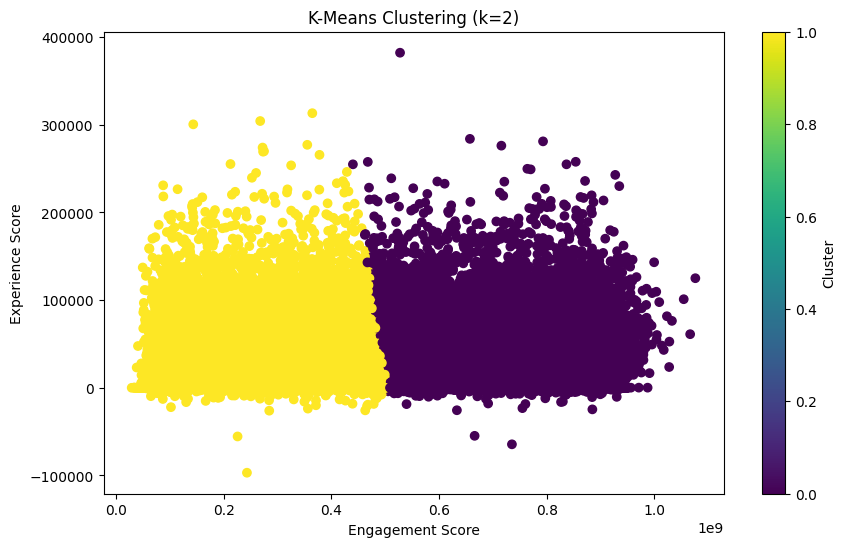

Cluster Centers:
[[7.10687558e+08 1.55885601e+04]
 [2.87585791e+08 1.42982890e+04]]


In [40]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(new_data['Engagement Score'], new_data['Experience Score'], c=new_data['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


In [41]:
import pandas as pd

# Assuming 'new_data' dataframe with 'Cluster', 'Satisfaction Score', and 'Experience Score'

# Group by 'Cluster' and calculate the average satisfaction and experience scores
cluster_aggregates = new_data.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

# Rename columns for clarity
cluster_aggregates.columns = ['Cluster', 'Average Satisfaction Score', 'Average Experience Score']

# Display the results
print(cluster_aggregates)


   Cluster  Average Satisfaction Score  Average Experience Score
0        0                3.549951e+08              15611.463421
1        1                1.434457e+08              14270.913339


In [42]:
# Call the function to export your final DataFrame to the PostgreSQL table
export_data_to_postgres(cluster_aggregates, 'user_experience_scores')

Data successfully exported to the table user_experience_scores


In [45]:
verify_export

<function db.verify_export()>